In [12]:
import pandas as pd

df = pd.read_csv("C:\\Users\\tparida\\Downloads\\public_transport_delays.csv")
print(df.head())

  trip_id        date      time transport_type  route_id origin_station  \
0  T00000  2023-01-01  05:00:00           Tram  Route_15     Station_31   
1  T00001  2023-01-01  05:15:00          Metro  Route_12     Station_49   
2  T00002  2023-01-01  05:30:00            Bus  Route_16     Station_29   
3  T00003  2023-01-01  05:45:00           Tram  Route_19     Station_26   
4  T00004  2023-01-01  06:00:00           Tram   Route_8     Station_18   

  destination_station scheduled_departure scheduled_arrival  \
0           Station_6            05:02:00          05:55:00   
1          Station_32            05:16:00          05:55:00   
2          Station_42            05:33:00          06:17:00   
3          Station_18            05:49:00          06:08:00   
4          Station_15            06:00:00          06:35:00   

   actual_departure_delay_min  ...  wind_speed_kmh precipitation_mm  \
0                          12  ...              46             13.0   
1                          1

In [15]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
print(df.isnull().any()) #event_type

# df["event_type"] = df["event_type"].fillna("None")
# print(df)


trip_id                       False
date                          False
time                          False
transport_type                False
route_id                      False
origin_station                False
destination_station           False
scheduled_departure           False
scheduled_arrival             False
actual_departure_delay_min    False
actual_arrival_delay_min      False
weather_condition             False
temperature_C                 False
humidity_percent              False
wind_speed_kmh                False
precipitation_mm              False
event_type                    False
event_attendance_est          False
traffic_congestion_index      False
holiday                       False
peak_hour                     False
weekday                       False
season                        False
delayed                       False
dtype: bool


In [29]:
print("Dataset Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

df_clean = df.dropna(subset=['delayed'])

df_clean["weather_condition"] = df_clean["weather_condition"].fillna("Unknown")
df_clean["destination_station"] = df_clean["destination_station"].fillna("None")

Dataset Shape: (2000, 24)
Missing values:
 trip_id                       0
date                          0
time                          0
transport_type                0
route_id                      0
origin_station                0
destination_station           0
scheduled_departure           0
scheduled_arrival             0
actual_departure_delay_min    0
actual_arrival_delay_min      0
weather_condition             0
temperature_C                 0
humidity_percent              0
wind_speed_kmh                0
precipitation_mm              0
event_type                    0
event_attendance_est          0
traffic_congestion_index      0
holiday                       0
peak_hour                     0
weekday                       0
season                        0
delayed                       0
dtype: int64


In [31]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\tparida\Downloads\public_transport_delays.csv")

df["weather_condition"] = df["weather_condition"].fillna("Unknown")
df["destination_station"] = df["destination_station"].fillna("None")
df["event_type"] = df["event_type"].fillna("None")

df = df.dropna(subset=["actual_departure_delay_min", "actual_arrival_delay_min", "temperature_C"])


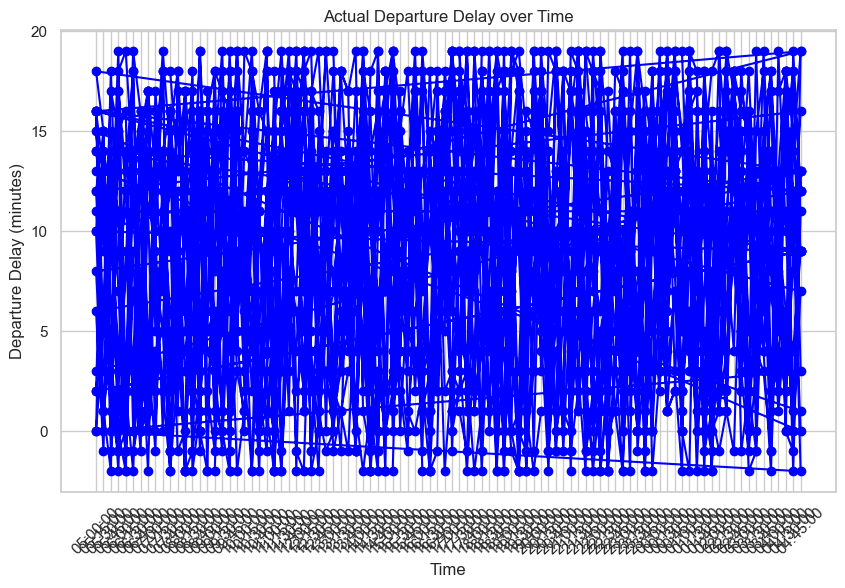

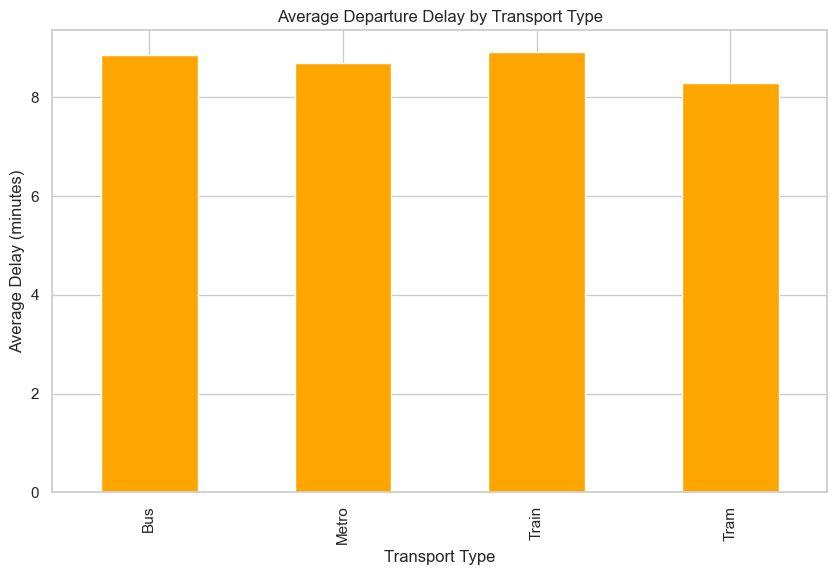

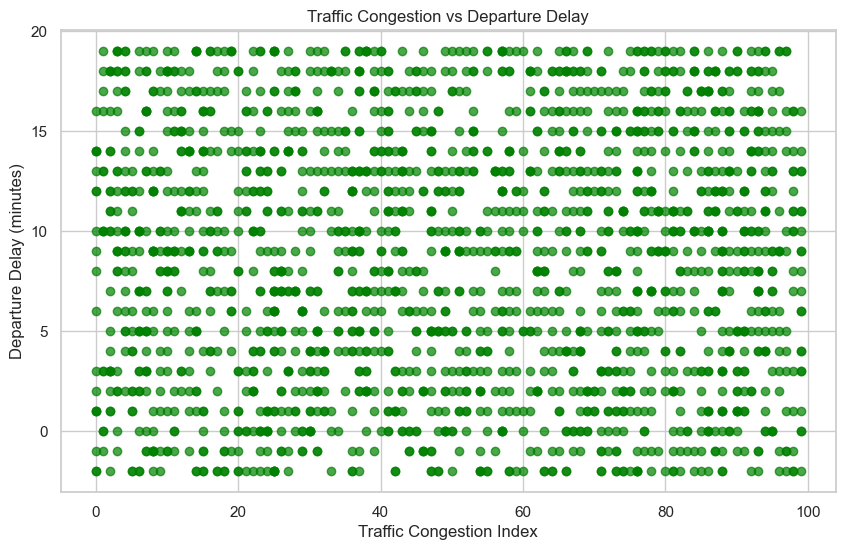

ValueError: could not convert string to float: 'T00000'

<Figure size 1200x800 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: improve plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# ------------------------------
# 1. Line Plot: Actual Departure Delay over Time
# ------------------------------
plt.figure()
plt.plot(df['time'], df['actual_departure_delay_min'], marker='o', color='blue')
plt.title("Actual Departure Delay over Time")
plt.xlabel("Time")
plt.ylabel("Departure Delay (minutes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ------------------------------
# 2. Bar Plot: Average Delay by Transport Type
# ------------------------------
avg_delay_transport = df.groupby('transport_type')['actual_departure_delay_min'].mean()
avg_delay_transport.plot(kind='bar', color='orange')
plt.title("Average Departure Delay by Transport Type")
plt.xlabel("Transport Type")
plt.ylabel("Average Delay (minutes)")
plt.show()

# ------------------------------
# 3. Scatter Plot: Traffic Congestion vs Departure Delay
# ------------------------------
plt.scatter(df['traffic_congestion_index'], df['actual_departure_delay_min'], c='green', alpha=0.7)
plt.title("Traffic Congestion vs Departure Delay")
plt.xlabel("Traffic Congestion Index")
plt.ylabel("Departure Delay (minutes)")
plt.show()

# ------------------------------
# 4. Optional: Heatmap of Correlations
# ------------------------------
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
